## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Data/Mouse_metadata.csv"
study_results_path = "../Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
full_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')

# Display the data table for preview
full_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(full_df.shape)
print(f"There are {full_df['Mouse ID'].nunique()} unique mice.")

(1893, 8)
There are 249 unique mice.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df = full_df[full_df.duplicated(['Mouse ID', 'Timepoint'])]
dupe_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = full_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')

# Reset index to account for dropped rows
clean_mice_df.reset_index(drop = False, inplace = True)

# Display the data table for preview
clean_mice_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,1,f932,0,45.0,0,Ketapril,Male,15,29
2,2,g107,0,45.0,0,Ketapril,Female,2,29
3,3,a457,0,45.0,0,Ketapril,Female,11,30
4,4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_mice_df.shape)
print(f"There are {clean_mice_df['Mouse ID'].nunique()} unique mice.")

(1888, 9)
There are 249 unique mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Using the aggregation method, produce the summary statistics in a single line

group_drug = clean_mice_df.groupby(['Drug Regimen'])

group_drug_df = group_drug['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

stat_rename = {"mean" : "Mean"
               ,"median" : "Median"
               ,"var" : "Variance"
               ,"std" : "StdDev"
               ,"sem" : "StdErrorMean"
              }
group_drug_df = group_drug_df.rename(columns = stat_rename)

group_drug_df.reset_index(drop = False, inplace = True)

group_drug_df

,Drug Regimen,Mean,Median,Variance,StdDev,StdErrorMean
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Receiving Treatment for SCC Tumor Growth'}, xlabel='Drug Regimen', ylabel='Count'>

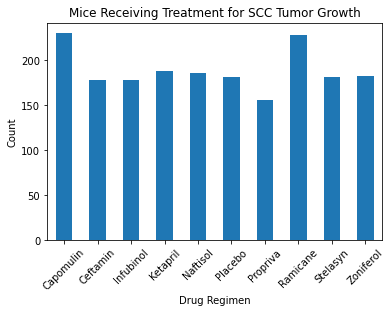

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

group_drug_count = group_drug["Drug Regimen"].count()

group_drug_count.plot(kind = 'bar'
                      ,title = 'Mice Receiving Treatment for SCC Tumor Growth'
                      ,ylabel = 'Count'
                      ,rot = 45
                     )

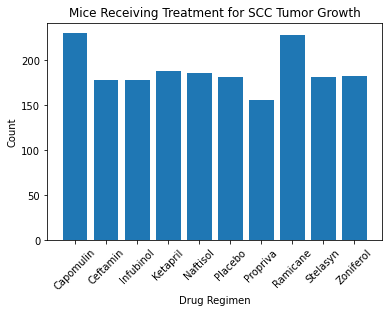

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(group_drug_count.index
        ,group_drug_count
       )

plt.title('Mice Receiving Treatment for SCC Tumor Growth')
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show();

<AxesSubplot:title={'center':'Proportion of Mice by Sex'}, ylabel='Sex'>

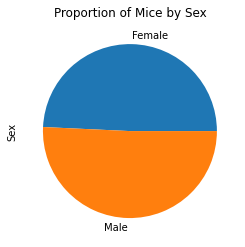

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_sex = clean_mice_df.groupby(['Sex'])

group_sex_count = group_sex["Sex"].count()

group_sex_count.plot(kind = 'pie'
                     ,title = 'Proportion of Mice by Sex'
)


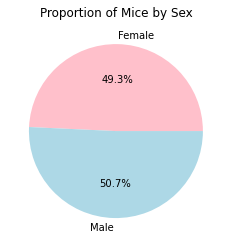

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(group_sex_count
        ,labels = group_sex_count.index
        ,colors = ["pink", "lightblue"]
        ,autopct = "%1.1f%%"
       )
plt.title('Proportion of Mice by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
